# Convolution
## Physics 481 Week 7

Convolution is an integral transform that combines two functions such as $f(x)$ and $g(x)$ in the following way

  $$ f \star g = \int\limits_{-\infty}^{+\infty} f(x^\prime) \, g(x-x^\prime) \, dx^\prime $$

This operation has many applications to physical measurements, signal processing, and image processing.  Convolution has several convenient properties

  $$ f \star g = g \star f  \qquad \mathrm{commutative}$$
  $$ f \star ( g \star h ) = (f \star g ) \star h  \qquad \mathrm{associative}$$
  $$ f \star ( g +h )= f \star g + f \star h  \qquad \mathrm{distributive}$$

Convolution with the Dirac delta function $\delta$ is particularly simple

 $$ f \star \delta = f $$

 $$ \int\limits_{-\infty}^{+\infty} f(x^\prime) \, \delta(x-x^\prime) \, dx^\prime  = f(x) $$

It can be shown that the Fourier transform of convolution is equivalent to multiplication of Fourier transforms

 $$ \mathcal{F} \{ f \star g \} = \mathcal{F}\{f\} \, \mathcal{F}\{g\} $$
 
Convolution can be extended to multiple dimensions.  For two functions $f(x,y)$ and $g(x,y)$ the process of convolution requires a double integral

  $$ f \star g = \int\limits_{-\infty}^{+\infty} \int\limits_{-\infty}^{+\infty} f(x^\prime, y^\prime) \, g(x-x^\prime, y-y^\prime) \, dx^\prime dy^\prime $$
  
which has a Fourier transform which can be replaced with the multiplication of two 2-D Fourier transforms.

## Image processing

There are many python modules which can be used for signal processing and image processing.  

 1) scipy http://www.scipy-lectures.org/advanced/image_processing/

 2) pillow https://pillow.readthedocs.io/en/3.4.x/handbook/tutorial.html#image-enhancement
 
 3) openCV http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html

We will mostly use numpy to start with.
 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.signal, scipy.misc
import PIL    # aka "pillow"
import time

In [13]:
#img = PIL.Image.open( 'c:/Users/bjackel/Dropbox/teach/phys481/dancing_house_prague.jpg' ) # .convert("L")
img = PIL.Image.open( 'dancing_house_prague.jpg' ) # .convert("L")
img.show()   # this will try to display using imagemagick

# This is one way to convert a PIL image to a numpy array and "flatten" it to grayscale
#dat = np.asarray( img.getdata() ).reshape( [img.size[1], img.size[0] , 3] )
#graydat = np.sum( dat.astype(np.float), -1 )
#plt.imshow( graydat, cmap=plt.cm.get_cmap('gray') )

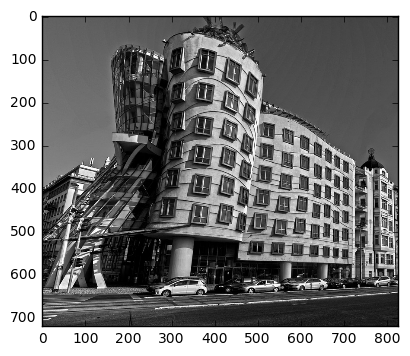

In [14]:
# Scipy wraps the PIL module to make it more consistent with numpy
#
dat = scipy.misc.imread('dancing_house_prague.jpg' , flatten=True)
plt.imshow( dat, cmap=plt.cm.gray )

## (Kroneker) Delta

We can think of 2D convolution as a process where we scan some small viewing area (AKA window, kernel) over a larger region, and replace values in the larger region with a weighted average.

This result is particularly simple if the kernel is a single 1 surrounded by zeros, otherwise known as a delta function.

(11, 11) (3, 3) (13, 13)


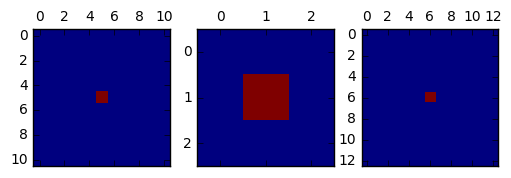

In [33]:
frame = np.zeros([11,11]) ; frame[5,5] = 1
kernel = np.zeros([3,3]) ; kernel[1,1] = 1
result = scipy.signal.convolve2d(frame, kernel, mode='full', boundary='fill')
fig,axes = plt.subplots(1,3)
axes[0].matshow(frame)
axes[1].matshow(kernel)
axes[2].matshow(result)
print( frame.shape, kernel.shape, result.shape )

(11, 11) (11, 11) (11, 11)


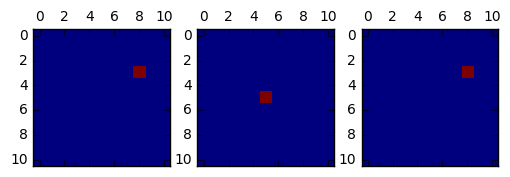

In [42]:
frame = np.zeros([11,11]) ; frame[3,8] = 1
kernel = np.zeros([11,11]) ; kernel[5,5] = 1
result = scipy.signal.convolve2d(frame, kernel, mode='same', boundary='fill')
fig,axes = plt.subplots(1,3)
for indx,obj in enumerate([frame, kernel, result]):
    axes[indx].matshow(obj) # axes[indx].set_xlim(0, len(frame)) ; axes[indx].set_ylim(0, len(frame))
print( frame.shape, kernel.shape, result.shape )

## Smoothing with boxcars

A wider uniform kernel will have the effect of smoothing the image, as it replaces each value with the sum of a larger region.

(111, 111) (11, 11) (111, 111)


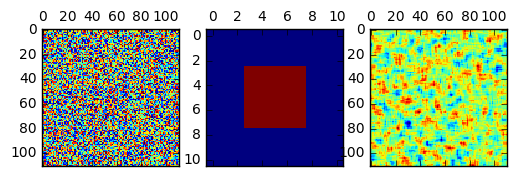

In [54]:
frame = np.random.rand(111,111)
kernel = np.zeros([11,11]) ; kernel[3:8,3:8] = 1
result = scipy.signal.convolve2d(frame, kernel, mode='same', boundary='wrap')
fig,axes = plt.subplots(1,3)
for indx,obj in enumerate([frame, kernel, result]):
    axes[indx].matshow(obj) # axes[indx].set_xlim(0, len(frame)) ; axes[indx].set_ylim(0, len(frame))
print( frame.shape, kernel.shape, result.shape )

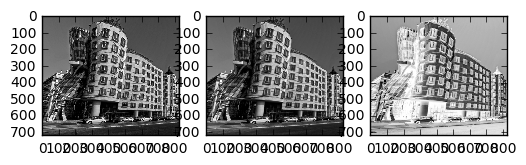

In [59]:
kernel = np.ones([3,3], dtype=float)
tmp = scipy.signal.convolve2d( dat , kernel, 'same', 'wrap')
fig, axes = plt.subplots(1,3)
axes[0].imshow( dat, cmap=plt.cm.get_cmap('gray') )
axes[1].imshow( tmp, cmap=plt.cm.get_cmap('gray') )
axes[2].imshow( dat- tmp, cmap=plt.cm.get_cmap('gray') )

### Blurring

Convolving with a large square kernel will result in a blurred image where each pixel is replaced with the average of many neighbors.

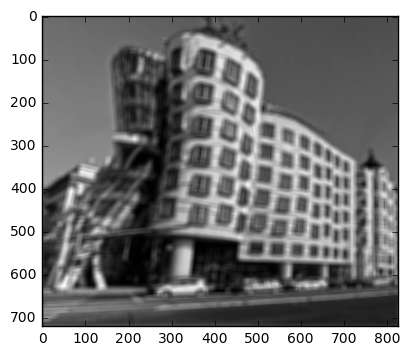

In [61]:
kernel = np.ones([13,13], dtype=float)
tmp = scipy.signal.convolve2d( dat , kernel, 'same', 'wrap')
plt.imshow( tmp, cmap=plt.cm.get_cmap('gray') )

## Edge detection

Sharp spatial gradients can be enhanced by convolution with appropriate filters.

Note that the distributive property of convolution means that we can combine an arbitrary number of different filters into a single operation.

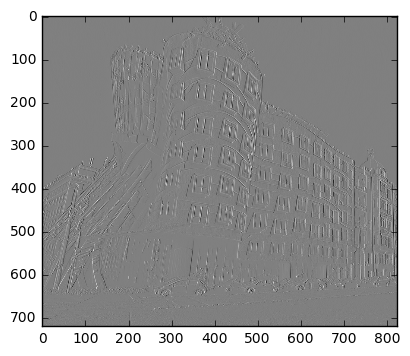

In [63]:
kernel = [ [1,-1] ]  # vertical edge enhancement
tmp = scipy.signal.convolve2d( dat , kernel, 'valid')
plt.imshow( tmp, cmap=plt.cm.get_cmap('gray') )

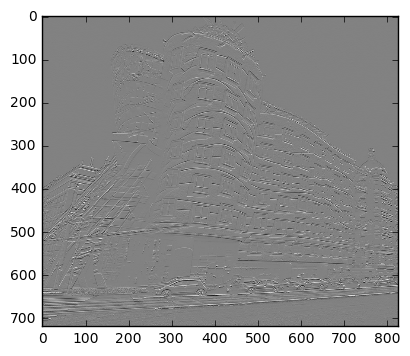

In [64]:
kernel = [ [1], [-1] ] #horizonal edge enhancement
tmp = scipy.signal.convolve2d( dat , kernel, 'valid')
plt.imshow( tmp, cmap=plt.cm.get_cmap('gray') )

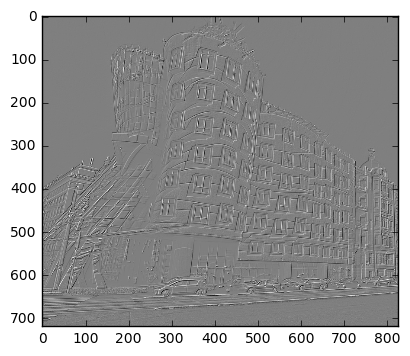

In [65]:
kernel = [[1,0], [0,-1]]
tmp = scipy.signal.convolve2d( dat , kernel, 'valid')
ims = plt.imshow( tmp, cmap=plt.cm.get_cmap('gray') )

https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.signal.convolve2d.html

Compute the gradient of an image by 2D convolution with a complex Scharr operator. (Horizontal operator is real, vertical is imaginary.) Use symmetric boundary condition to avoid creating edges at the image boundaries.

In [1]:
from scipy import misc
ascent = misc.ascent()
scharr = np.array([[ -3-3j, 0-10j,  +3 -3j],
                    [-10+0j, 0+ 0j, +10 +0j],
                    [ -3+3j, 0+10j,  +3 +3j]]) # Gx + j*Gy
grad = scipy.signal.convolve2d(ascent, scharr, boundary='symm', mode='same')

import matplotlib.pyplot as plt
title = ['original', 'gradient\nmagnitude', 'gradient\orientation']
fig, axes = plt.subplots(3,1, figsize=(6, 15))
for indx,obj in enumerate([ascent, np.abs(grad), np.angle(grad)]):
    axes[indx].imshow( obj, cmap=['gray', 'gray', 'hsv'][indx] )
    axes[indx].set_title( title[indx] )

NameError: name 'np' is not defined

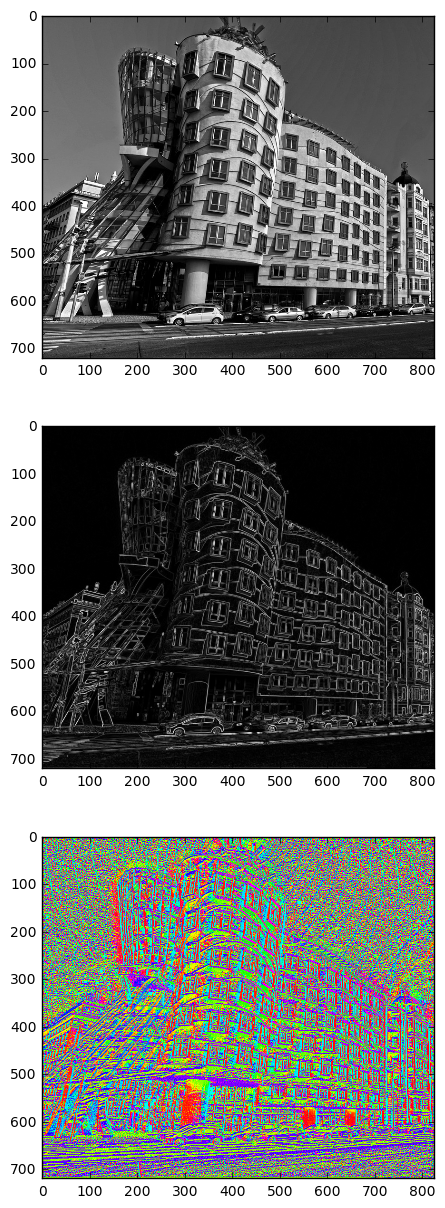

In [76]:
from scipy import misc
ascent = misc.ascent()
scharr = np.array([[ -3-3j, 0-10j,  +3 -3j],
                    [-10+0j, 0+ 0j, +10 +0j],
                    [ -3+3j, 0+10j,  +3 +3j]]) # Gx + j*Gy
grad = scipy.signal.convolve2d(dat, scharr, boundary='symm', mode='same')

import matplotlib.pyplot as plt
fig, axes = plt.subplots(3,1, figsize=(6, 15))
for indx,obj in enumerate([dat, np.abs(grad), np.angle(grad)]):
    axes[indx].imshow( obj, cmap=['gray', 'gray', 'hsv'][indx] )